<a href="https://colab.research.google.com/github/Nsimaar99/udacityproject1/blob/mr/imageo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AI Programming with Python Nanodegree: Image Classifier Project
  - Do not make changes to the first 2 code cells, they are being used for setting up the `flowers` dataset and `cat_to_name.json`. Start writing code from third code cell onwards.
  - To use this notebook: `File > Save a copy in Drive`
  

### Code Explanation:

- **Setting Up Flower Dataset:**
  - `data_dir = './flowers'`: Defines the directory path for the flower dataset.
  - `FLOWERS_DIR = Path(data_dir)`: Uses `Path` from `pathlib` for handling PosixPath.

- **Downloading and Extracting Dataset:**
  - `if not FLOWERS_DIR.is_dir()`: Checks if the dataset directory exists.
    - `FLOWERS_DIR.mkdir(parents=True, exist_ok=True)`: Creates the directory if not present.
  - `TARBALL = FLOWERS_DIR / "flower_data.tar.gz"`: Defines the tarball path.
  - Downloads and extracts the dataset if not already present:
    - `request = requests.get(...)`: Downloads the 'flower_data.tar.gz' file.
    - `with open(TARBALL, "wb") as file_ref`: Writes the downloaded content to the tarball.
    - `with tarfile.open(TARBALL, "r") as tar_ref`: Extracts the tarball contents to the dataset directory.

- **Cleaning Up:**
  - `os.remove(TARBALL)`: Deletes the downloaded tarball to save space.

- **Status Messages:**
  - Prints informative messages about the directory creation, download, extraction, and cleanup.


In [1]:
# imports
import os
import requests
from pathlib import Path
import tarfile

# defining dataset directory
data_dir = './flowers'

# using pathlib.Path for handling PosixPath
FLOWERS_DIR = Path(data_dir)

# downloading and setting up data if not already present
if not FLOWERS_DIR.is_dir():
    # creating directory
    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print() # for readability

    # tarball path
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # downloading and writing the tarball to './flowers' directory
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print() # for readability

    # extracting the downloaded tarball
    print(f"[INFO] Extracting the downloaded tarball to ./{FLOWERS_DIR}")
    with tarfile.open(TARBALL, "r") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)
        print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")

    print() # for readability

    # using os.remove to delete the downloaded tarball
    print("[INFO] Deleting the tarball to save space.")
    os.remove(TARBALL)
else:
    print(f"[INFO] Dataset already setup at ./{FLOWERS_DIR}")

[INFO] Directory created: ./flowers

[INFO] Downloading the file 'flower_data.tar.gz' to ./flowers
[INFO] 'flower_data.tar.gz' saved to ./flowers

[INFO] Extracting the downloaded tarball to ./flowers
[INFO] 'flower_data.tar.gz' extracted successfully to ./flowers

[INFO] Deleting the tarball to save space.


### Code Explanation:

- **Creating a JSON File for Flower Categories:**
  - `data`: Defines a dictionary containing numerical keys and corresponding flower names.
  - `with open('cat_to_name.json', 'w') as file`: Opens the file 'cat_to_name.json' for writing.
  - `json.dump(data, file)`: Writes the dictionary data to the JSON file.

- **Interpreting the Output:**
  - The code creates a JSON file named 'cat_to_name.json' that serves as a mapping between numerical keys and flower names. This mapping can be useful for associating numerical labels with human-readable names in machine learning tasks.


In [2]:
import json

data = {
    "21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster",
    "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy",
    "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly",
    "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist",
    "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower",
    "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation",
    "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone",
    "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow",
    "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid",
    "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia",
    "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura",
    "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium",
    "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily",
    "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william",
    "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon",
    "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula",
    "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower",
    "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple",
    "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus",
    "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily",
    "46": "wallflower", "77": "passion flower", "51": "petunia"
}

with open('cat_to_name.json', 'w') as file:
    json.dump(data, file)

In [3]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms, models
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import json
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from collections import OrderedDict
import pandas as pd
import os
import seaborn as sns

In [4]:
import glob
import os

# Define the root directory where the images are located
root_dir = '/content/flowers/test/'

# Use glob to recursively find all images in the root directory and subdirectories
image_paths = glob.glob(os.path.join(root_dir, '**/*.jpg'), recursive=True)

# Print all the image paths
for image_path in image_paths:
    print(image_path)

/content/flowers/test/92/image_03049.jpg
/content/flowers/test/92/image_03048.jpg
/content/flowers/test/92/image_03054.jpg
/content/flowers/test/92/image_03044.jpg
/content/flowers/test/92/image_03058.jpg
/content/flowers/test/92/image_03056.jpg
/content/flowers/test/92/image_03052.jpg
/content/flowers/test/92/image_03032.jpg
/content/flowers/test/92/image_03075.jpg
/content/flowers/test/92/image_03041.jpg
/content/flowers/test/92/image_03039.jpg
/content/flowers/test/58/image_02737.jpg
/content/flowers/test/58/image_02738.jpg
/content/flowers/test/58/image_02687.jpg
/content/flowers/test/58/image_02695.jpg
/content/flowers/test/58/image_02743.jpg
/content/flowers/test/58/image_02719.jpg
/content/flowers/test/58/image_02672.jpg
/content/flowers/test/58/image_02722.jpg
/content/flowers/test/58/image_02752.jpg
/content/flowers/test/58/image_02681.jpg
/content/flowers/test/58/image_02721.jpg
/content/flowers/test/58/image_02694.jpg
/content/flowers/test/58/image_02663.jpg
/content/flowers

In [5]:
# creating function for maintaining reproducibility

def manual_seed(random_seed: int = 42) -> None:
    '''
    For maintaining reproducibility of a notebook cell.
    '''
    # for non-cuda
    torch.manual_seed(random_seed)
    # in case cuda exists
    if torch.cuda.is_available():
        torch.cuda.manual_seed(random_seed)

# creating device agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# clearing cache if using GPU
if str(device) == "cuda":
    torch.cuda.empty_cache()

In [6]:
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [7]:
# TODO: Define your transforms for the training, validation, and testing sets
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomRotation(15),
        transforms.RandomResizedCrop((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),

    'valid': transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),

    'test': transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# TODO: Load the datasets with ImageFolder
image_datasets = {
    'train': datasets.ImageFolder(train_dir, transform=data_transforms['train']),
    'valid': datasets.ImageFolder(valid_dir, transform=data_transforms['valid']),
    'test': datasets.ImageFolder(test_dir, transform=data_transforms['test']),
}

# TODO: Using the image datasets and the transforms, define the dataloaders
dataloaders = {
    'train': DataLoader(image_datasets['train'], batch_size=64, shuffle=True),
    'valid': DataLoader(image_datasets['valid'], batch_size=64, shuffle=False),
    'test': DataLoader(image_datasets['test'], batch_size=64, shuffle=False)
}

# Now you can access the number of classes
num_classes = len(image_datasets['train'].class_to_idx)

print(f"The dataset has {num_classes} classes.")

The dataset has 102 classes.


In [ ]:
import json

def load_label_mapping(json_file_path):
    """
    Load the label mapping from a JSON file and return a dictionary
    that maps class indices to flower names.

    Args:
    json_file_path (str): Path to the JSON file containing the label mapping.

    Returns:
    dict: A dictionary where keys are class indices (as strings) and values are the corresponding flower names.
    """
    with open(json_file_path, 'r') as f:
        cat_to_name = json.load(f)
    return cat_to_name

def get_flower_name(class_index, label_mapping):
    """
    Convert a class index to its corresponding flower name using the label mapping.

    Args:
    class_index (int): The class index of the flower.
    label_mapping (dict): Dictionary mapping class indices to flower names.

    Returns:
    str: The flower name corresponding to the class index.
    """
    return label_mapping.get(str(class_index), "Unknown class")

# Example usage
json_file_path = 'cat_to_name.json'
label_mapping = load_label_mapping(json_file_path)

# Example class indices to test
example_class_indices = [21, 3, 45]

# Map class indices to flower names
flower_names = [get_flower_name(index, label_mapping) for index in example_class_indices]

print(flower_names)  # Outputs the flower names corresponding to the indices


['fire lily', 'canterbury bells', 'bolero deep blue']


In [8]:
import torch

def get_device():
    """
    Check for CUDA availability and return the appropriate device.

    Returns:
    torch.device: The device to be used for computation (either 'cuda' or 'cpu').
    """
    if torch.cuda.is_available():
        device = torch.device('cuda')
        print(f"Using GPU: {torch.cuda.get_device_name(0)}")
    else:
        device = torch.device('cpu')
        print("Using CPU")
    return device

# Example usage
device = get_device()

Using GPU: Tesla T4


In [9]:
# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the pre-trained ResNet50 model with default weights
model = models.resnet50(weights='DEFAULT')

# Modify the final fully connected layer for your specific number of classes
num_classes = 102  # Update this according to your dataset
model.fc = nn.Sequential(
    nn.Linear(in_features=2048, out_features=512),
    nn.ReLU(),
    #nn.Dropout(p=0.5),  # Dropout layer with 50% probability
    nn.Linear(in_features=512, out_features=num_classes)
)

# Move model to the device
model.to(device)

# Define the criterion (loss function)
criterion = nn.CrossEntropyLoss()

# Define the optimizer
# Only parameters of the classifier (not the frozen layers) should be updated
optimizer = optim.Adam(model.fc.parameters(), lr=1e-3)

# Print the model architecture to verify
print(model)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 186MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
# Define the number of epochs
epochs = 5
steps = 0
print_every = 20

# Training loop
for epoch in range(epochs):
    model.train()   # switching model to training mode
    running_loss = 0
    for inputs, labels in dataloaders['train']:  # Use dataloaders['train']
        steps += 1
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.type(torch.long).to(device)

        optimizer.zero_grad()
        # Forward pass
        logits = model(inputs)
        loss = criterion(logits, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if steps % print_every == 0:
            model.eval()
            test_loss = 0
            accuracy = 0
            # Use dataloaders['test'] here
            for inputs, labels in dataloaders['valid']:  # Use dataloaders['test']
                inputs, labels = inputs.to(device), labels.type(torch.long).to(device)  # Move to device
                with torch.inference_mode():
                    logits = model(inputs)
                loss = criterion(logits, labels)
                test_loss += loss.item()

                # Calculate accuracy
                ps = torch.softmax(logits, dim=-1)
                top_class = ps.argmax(dim=-1)
                equality = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equality.type(torch.FloatTensor))

            print(f"Epoch {epoch+1}/{epochs}.."
                  f"Train loss: {running_loss/print_every:.3f}.."
                  f"Validation loss: {test_loss/len(dataloaders['valid']):.3f}.."
                  f"Validation accuracy: {accuracy/len(dataloaders['valid']):.3f}..")

Epoch 1/5..Train loss: 4.021..Validation loss: 3.545..Validation accuracy: 0.330..
Epoch 1/5..Train loss: 7.228..Validation loss: 2.665..Validation accuracy: 0.460..
Epoch 1/5..Train loss: 9.593..Validation loss: 1.922..Validation accuracy: 0.633..
Epoch 1/5..Train loss: 11.392..Validation loss: 1.400..Validation accuracy: 0.708..
Epoch 1/5..Train loss: 12.810..Validation loss: 1.153..Validation accuracy: 0.742..
Epoch 2/5..Train loss: 0.965..Validation loss: 1.005..Validation accuracy: 0.773..
Epoch 2/5..Train loss: 1.943..Validation loss: 0.843..Validation accuracy: 0.807..
Epoch 2/5..Train loss: 2.819..Validation loss: 0.692..Validation accuracy: 0.849..
Epoch 2/5..Train loss: 3.621..Validation loss: 0.667..Validation accuracy: 0.840..
Epoch 2/5..Train loss: 4.366..Validation loss: 0.595..Validation accuracy: 0.851..
Epoch 3/5..Train loss: 0.476..Validation loss: 0.537..Validation accuracy: 0.862..
Epoch 3/5..Train loss: 1.094..Validation loss: 0.503..Validation accuracy: 0.878..
Ep

In [12]:
# TODO: Save the checkpoint
# Define the checkpoint dictionary
checkpoint = {
    'epoch': epochs,  # Number of epochs trained
    'model_state_dict': model.state_dict(),  # Model's state dict
    'optimizer_state_dict': optimizer.state_dict(),  # Optimizer's state dict
    'class_to_idx': image_datasets['train'].class_to_idx,  # Mapping from class index to class name
    'input_size': 224,  # Input size used for the model
    'hidden_units': 512,  # Example of hidden units, adjust as necessary
    'learning_rate': 0.001  # Learning rate used
}

# Save the checkpoint
torch.save(checkpoint, 'checkpoint.pth')
print("Checkpoint saved successfully!")

# Load the checkpoint
checkpoint = torch.load('checkpoint.pth')

# Restore the model state
model.load_state_dict(checkpoint['model_state_dict'])

# Restore the optimizer state
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# Restore other information if needed
epochs = checkpoint['epoch'] # Changed num_epochs to epochs
class_to_idx = checkpoint['class_to_idx']

Checkpoint saved successfully!


<ipython-input-12-a86623414c40>:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('checkpoint.pth')


In [13]:
def load_checkpoint(filepath):
    # Load the checkpoint
    checkpoint = torch.load(filepath)

    # Rebuild the model
    model = models.resnet50(pretrained=True)  # Adjust the model as necessary
    for param in model.parameters():
        param.requires_grad = False  # Freeze the parameters

    # Modify the classifier to match the number of classes in your dataset and the original structure
    num_classes = len(checkpoint['class_to_idx'])  # Get the number of classes from the checkpoint
    model.fc = nn.Sequential(
        nn.Linear(in_features=2048, out_features=512),
        nn.ReLU(),
        nn.Linear(in_features=512, out_features=num_classes)
    )

    # Load the model state
    model.load_state_dict(checkpoint['model_state_dict'])

    # Restore other information if needed
    optimizer = torch.optim.Adam(model.fc.parameters(), lr=checkpoint['learning_rate'])  # Adjust optimizer as necessary
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    return model, optimizer, checkpoint['epoch'], checkpoint['class_to_idx']

# Example usage
model, optimizer, start_epoch, class_to_idx = load_checkpoint('checkpoint.pth')
print("Model and optimizer loaded successfully!")

<ipython-input-13-e287b6421453>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filepath)
/usr/local/lib/python3.10/dist-packages/torchvision/models

Model and optimizer loaded successfully!


In [14]:
from PIL import Image

def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    # Open the image using Image.open() to get the image object
    # image_path = '/content/flowers/test/100/image_07896.jpg'  # Replace with the actual path to your image
    # image = Image.open(image_path)
    # process_image(image)

    # Verify that the image object is successfully loaded
    print(type(image))  # This should output <class 'PIL.JpegImagePlugin.JpegImageFile'> or similar

    # Define the desired size for the image
    size = 256  # Resize to 256x256
    crop_size = 224  # Crop to 224x224

    # Step 1: Resize the image
    image = image.resize((size, size))
    resized_image = image.resize((256, 256))
    # Save the resized image or display it
    resized_image.save('resized_image.jpg')
    resized_image.show()

    # Step 2: Center crop the image
    left = (size - crop_size) / 2
    top = (size - crop_size) / 2
    right = (size + crop_size) / 2
    bottom = (size + crop_size) / 2
    image = image.crop((left, top, right, bottom))

    # Step 3: Convert the image to a numpy array
    image_array = np.array(image)

    # Step 4: Normalize the image
    # Normalize using the mean and standard deviation for ImageNet
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # Scale the pixel values to [0, 1]
    image_array = image_array / 255.0

    # Normalize the image
    image_array = (image_array - mean) / std

    # Step 5: Rearrange the dimensions to match PyTorch's input format (C, H, W)
    image_array = image_array.transpose((2, 0, 1))  # Change from (H, W, C) to (C, H, W)

    return image_array

In [15]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()

    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0)) if not isinstance(image, np.ndarray) else image.transpose((1,2,0))

    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)

    ax.imshow(image)

    return ax

In [16]:

import torch
from PIL import Image
import torchvision.transforms as transforms

import json

with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model. '''

    # Load the image
    image = Image.open(image_path)

    # Define the transformations (make sure they match the training transformations)
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    # Preprocess the image
    image = preprocess(image)

    # Add a batch dimension
    image = image.unsqueeze(0)  # Shape: [1, C, H, W]

    # Put the model in evaluation mode
    model.eval()

    with torch.no_grad():  # Disable gradient calculation
        output = model(image)  # Forward pass
        probabilities = torch.nn.functional.softmax(output, dim=1)  # Apply softmax to get probabilities

        # Get the top K probabilities and indices
        top_probs, top_indices = torch.topk(probabilities, topk)

        # Convert to numpy arrays and detach from the graph
        top_probs = top_probs.numpy().flatten()
        top_indices = top_indices.numpy().flatten()

    return top_probs, top_indices

#test
#'path/to/your/image.jpg -> change into actual path
#image_path = 'path/to/your/image.jpg'  # Replace with your image path
image_path = '/content/flowers/test/30/image_03538.jpg'  # Replace with your image path
top_probs, top_indices = predict(image_path, model, topk=5)

# creating inverse mapping
idx_to_class = {val: key for (key, val) in image_datasets["train"].class_to_idx.items()}

print("Top 5 Predictions:")
for i in range(len(top_probs)):
    print(f"Flower name: {cat_to_name[idx_to_class[top_indices[i]]]}, Probability: {top_probs[i]}")

Top 5 Predictions:
Flower name: sweet william, Probability: 0.997247040271759
Flower name: barbeton daisy, Probability: 0.0012764929560944438
Flower name: blanket flower, Probability: 0.0005832905299030244
Flower name: japanese anemone, Probability: 0.00026085259742103517
Flower name: carnation, Probability: 0.0002514273510314524


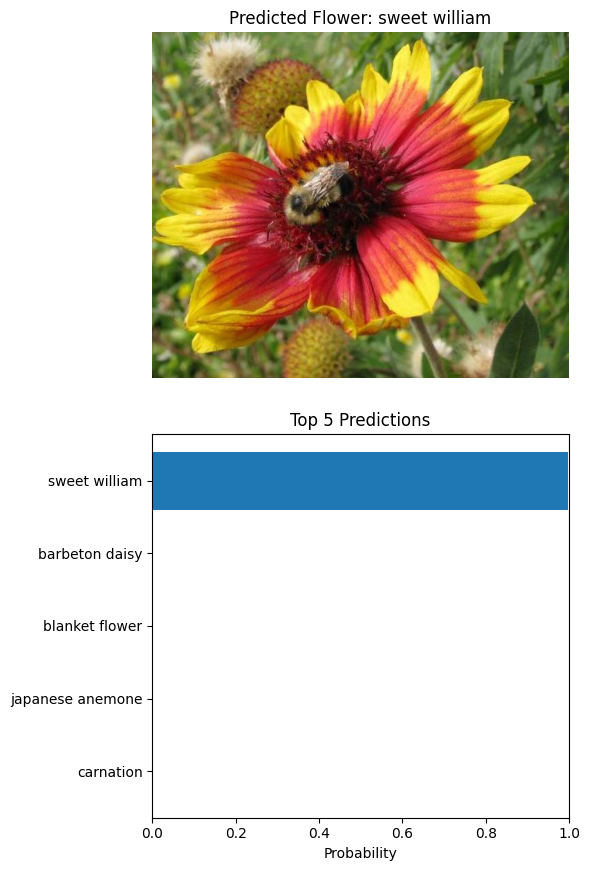

In [17]:
# Correction done: pay attention to this

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def display_image_with_predictions(image, top_classes, probabilities):
    """Display an image along with the top 5 predicted classes and their probabilities."""

    # Create a figure with two subplots: one for the image and one for the bar graph
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

    # Display the image in the first subplot
    ax1.imshow(image)
    ax1.axis('off')  # Hide the axis

    # Set the title to the top predicted class (the first in the top_classes list)
    top_class_name = top_classes[0]
    ax1.set_title(f'Predicted Flower: {top_class_name}')

    # Create a horizontal bar plot in the second subplot
    y_pos = np.arange(len(top_classes))
    ax2.barh(y_pos, probabilities, align='center')
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(top_classes)
    ax2.invert_yaxis()  # Invert y-axis so the highest probability is at the top
    ax2.set_xlabel('Probability')
    ax2.set_xlim([0, 1])  # Set x-axis limits between 0 and 1

    # Add title for the bar chart
    ax2.set_title('Top 5 Predictions')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Assuming 'cat_to_name' and 'idx_to_class' are defined elsewhere in your code

# Load an example image (make sure to provide the correct path to your image)
image_path = '/content/flowers/test/100/image_07896.jpg'  # Update this path
image = Image.open(image_path)

# Example top classes and probabilities (assuming you have the top_indices and top_probs)
top_classes = [cat_to_name[idx_to_class[item]] for item in top_indices]

# Display the image along with the top 5 classes
display_image_with_predictions(image, top_classes, top_probs)